# Dashboard

In [1]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from plotnine import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando o dataset
df = pd.read_csv("previsaoreceita.csv", sep=';')

df

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes
0,206461,Paid Marketing,2014,W09,71,71,2
1,462640,Paid Marketing,2015,W25,28,56,1
2,666461,Referral,2015,W50,40,40,1
3,183202,Referral,2013,W42,18,37,1
4,410993,Referral,2014,W29,0,37,1
...,...,...,...,...,...,...,...
715870,741230,Referral,2015,W51,0,40,1
715871,170503,Paid Marketing,2015,W25,9,37,1
715872,169910,Referral,2015,W04,37,37,1
715873,542301,Paid Marketing,2015,W11,56,56,1


In [3]:
# Inserindo a coluna "date" como datetime e corrigindo o formato

df['date'] = pd.to_datetime((df['year'].astype(str) + ' ' + df['week'] + " 1"), format="%Y W%W %w")
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,date
0,206461,Paid Marketing,2014,W09,71,71,2,2014-03-03
1,462640,Paid Marketing,2015,W25,28,56,1,2015-06-22
2,666461,Referral,2015,W50,40,40,1,2015-12-14
3,183202,Referral,2013,W42,18,37,1,2013-10-21
4,410993,Referral,2014,W29,0,37,1,2014-07-21


In [4]:
# agrupando por data e somando os valores para total semanal

df_dashboard = df.groupby(by='date', as_index=False).sum()

In [5]:
# dropando colunas que não serão utilizadas

df_dashboard.drop(columns=(['customer_id', 'boxes', 'year']),inplace=True)

In [6]:
df_dashboard

,date,net_revenue,gross_revenue
0,2013-01-14,2310,4047
1,2013-01-21,12342,20296
2,2013-01-28,25807,35253
3,2013-02-04,35713,44641
4,2013-02-11,41898,52335
...,...,...,...
150,2015-11-30,245756,286294
151,2015-12-07,265797,310562
152,2015-12-14,261247,295797
153,2015-12-21,216590,240226


In [7]:
df_dashboard.describe()

,net_revenue,gross_revenue
count,155.000000,155.000000
mean,168186.458065,191349.161290
std,58405.262689,65795.835986
min,2310.000000,4047.000000
25%,134519.500000,158289.000000
50%,182827.000000,207843.000000
75%,206546.500000,233300.500000
max,323891.000000,363693.000000


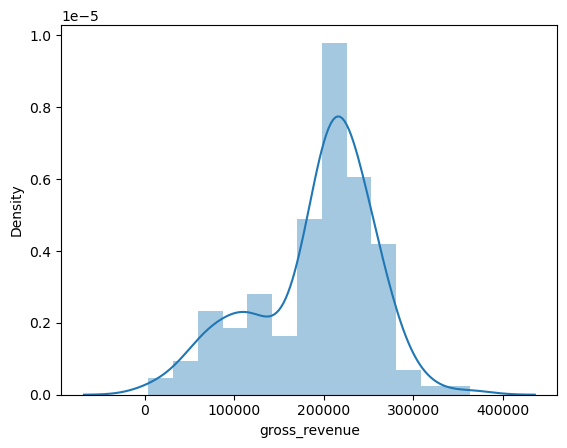

In [8]:
# Verificando a distribuição

sns.distplot(df_dashboard['gross_revenue']);

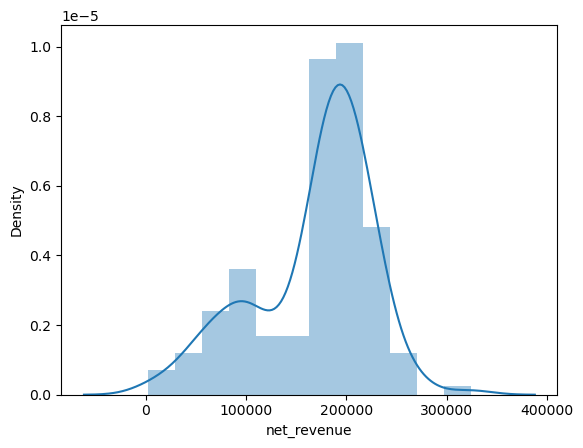

In [13]:
sns.distplot(df_dashboard['net_revenue']);

In [37]:
# Nível de densidade Leptocúrtica

df_dashboard.kurtosis()

net_revenue      17.456104
gross_revenue    14.524173
dtype: float64

In [14]:
# exibindo a variação para verificação da dispersão dos dados

df_dashboard['net_revenue'].var()

3411174709.7303715

In [15]:
# consultando o desvio padrão para analisar quanto os dados estão distantes da média

df_dashboard['net_revenue'].std()

58405.26268865137

In [16]:
# tirando o log para diminuir a variância e desvio padrão dos dados
# aproximando-os da média, deixando-os mais próximos de distribuição normal
# e melhorando o desempenho do modelo
 

df_dashboard['net_revenue'] = np.log(df_dashboard['net_revenue'])

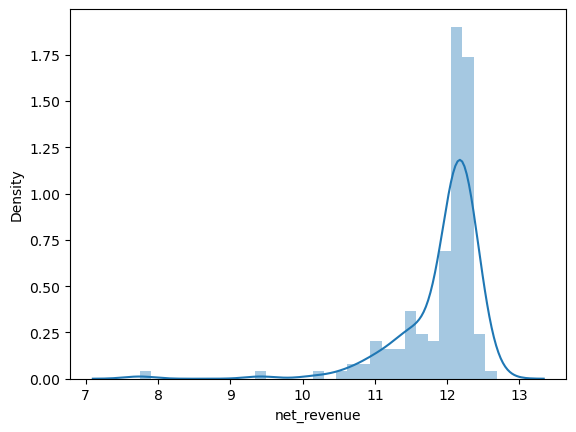

In [17]:
# Distribuição exponencial enviesada para esquerda

sns.distplot(df_dashboard['net_revenue']);

In [18]:
# Aqui vemos que o desvio-padrão tornou-se muito menor

df_dashboard['net_revenue'].std()

0.5916915430442083

In [19]:
# Menor variação, melhor desempenho

df_dashboard['net_revenue'].var()

0.35009888211003626

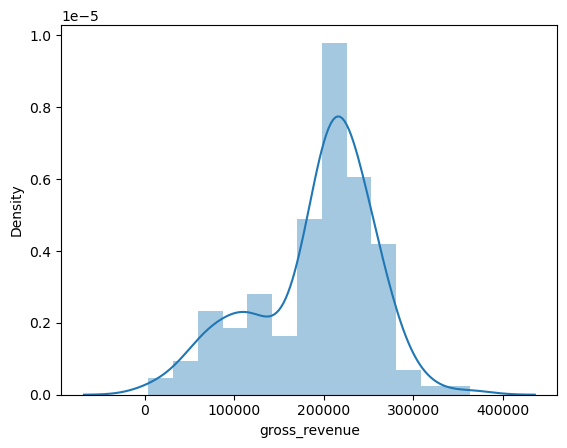

In [20]:
sns.distplot(df_dashboard['gross_revenue']);

In [21]:
df_dashboard['gross_revenue'].std()

65795.83598639922

In [22]:
df_dashboard['gross_revenue'].var()

4329092033.149147

In [23]:
df_dashboard['gross_revenue'] = np.log(df_dashboard['gross_revenue'])

In [24]:
df_dashboard['gross_revenue'].std()

0.5525069531965929

In [25]:
df_dashboard['gross_revenue'].var()

0.30526393333058216

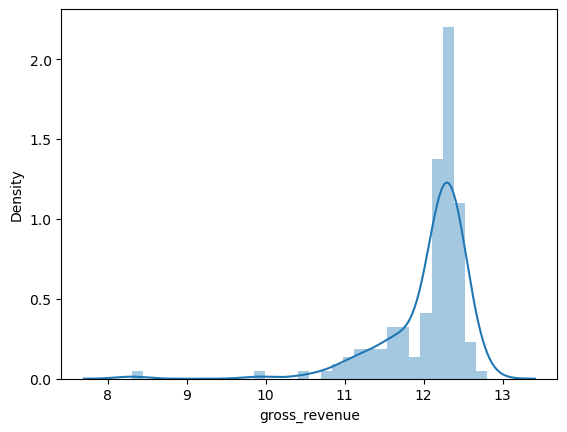

In [26]:
# Distribuição exponencial enviesada para esquerda

sns.distplot(df_dashboard['gross_revenue']);

In [27]:
# Teste de shapiro-Wilk
# Como o valor p está muito menor que o nível de significância de 0.05,
# há evidências suficientes para negar a hipótese nula e aceitar a alternativa
# de que a distribuição NÃO é normal e sim alternativa

shapiro(df_dashboard['gross_revenue'])

ShapiroResult(statistic=0.7184820175170898, pvalue=6.891274770403776e-16)

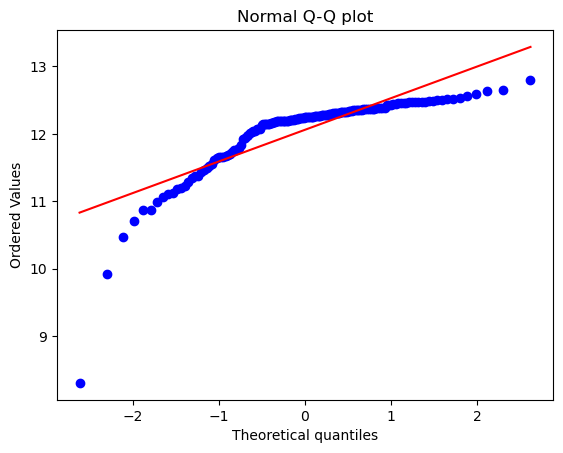

In [28]:
# Mais um teste para mostrar que a distribuição não é normal

stats.probplot(df_dashboard['gross_revenue'], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [29]:
# Mais um teste que demonstra haver evidências suficientes para rejeitar a hipótese nula
# e aceitar a hipótese alternativa de que a distribuição NÃO é normal e sim alternativa

shapiro(df_dashboard['net_revenue'])

ShapiroResult(statistic=0.6835340261459351, pvalue=7.714647043416609e-17)

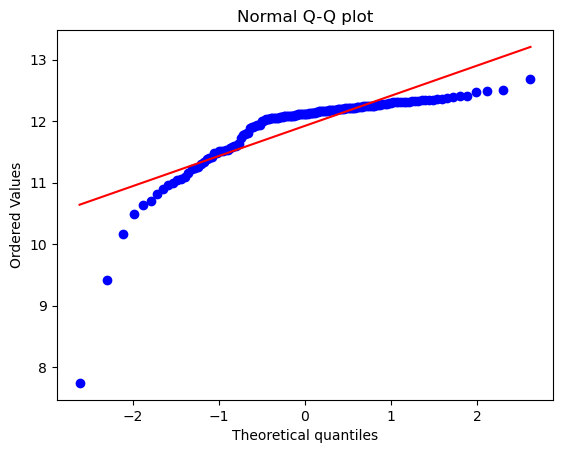

In [30]:
stats.probplot(df_dashboard['net_revenue'], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

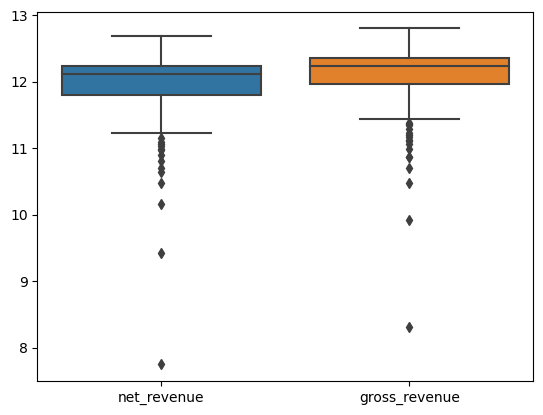

In [39]:
# analisando a diferença dos quartis, interquartis, mediana,
# valores mínimos e máximos, além de alguns outliers

sns.boxplot(data = df_dashboard.iloc[:, 1:]);

In [33]:
df_dashboard.mean(), df_dashboard.median()

(net_revenue      11.923673
 gross_revenue    12.060949
 dtype: float64,
 net_revenue      12.116296
 gross_revenue    12.244538
 dtype: float64)

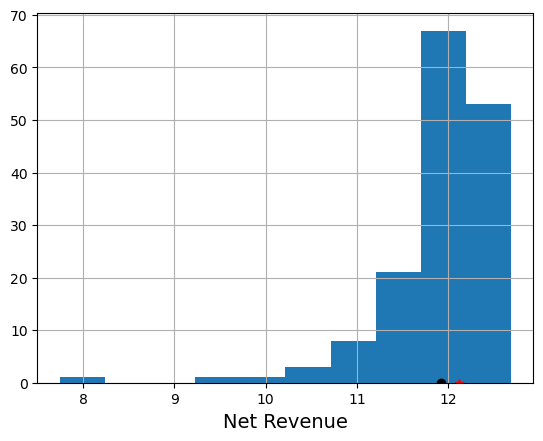

In [41]:
# Plota um histograma com a média em vermelho e a mediana em preto

nome = 'Net Revenue'
name = 'Gross Revenue'
df_dashboard['net_revenue'].hist()

plt.xlabel(nome, size=14)

# Média, mediana
plt.plot(df_dashboard['net_revenue'].median(),0, '*r')
plt.plot(df_dashboard['net_revenue'].mean(), 0, 'ok')
plt.show()

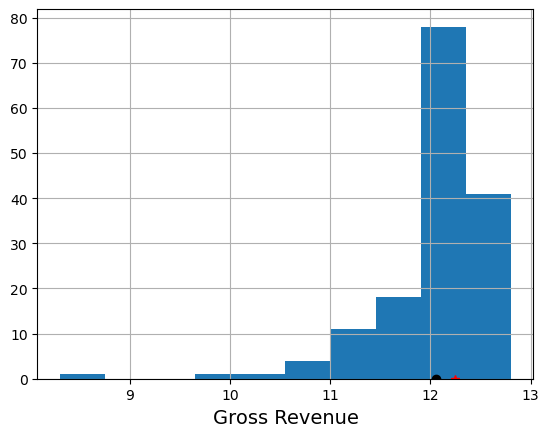

In [42]:
df_dashboard['gross_revenue'].hist()

plt.xlabel(name, size=14)

# Média, mediana
plt.plot(df_dashboard['gross_revenue'].median(),0, '*r')
plt.plot(df_dashboard['gross_revenue'].mean(), 0, 'ok')
plt.show()

## Resultado de vendas: Gross Revenue e Net Revenue

In [40]:
df_dashboard

,date,net_revenue,gross_revenue
0,2013-01-14,7.745003,8.305731
1,2013-01-21,9.420763,9.918179
2,2013-01-28,10.158401,10.470306
3,2013-02-04,10.483270,10.706408
4,2013-02-11,10.642993,10.865421
...,...,...,...
150,2015-11-30,12.412094,12.564775
151,2015-12-07,12.490488,12.646139
152,2015-12-14,12.473222,12.597429
153,2015-12-21,12.285761,12.389335


## Maiores vendas

In [44]:
average_ticket = df.groupby(by=(['year', 'customer_acquisition_channel']), as_index=False).mean()
average_ticket.drop(columns=(['customer_id', 'net_revenue', 'boxes']), inplace=True)
average_ticket

,year,customer_acquisition_channel,gross_revenue
0,2013,Paid Marketing,42.076349
1,2013,Referral,39.821818
2,2014,Paid Marketing,41.347089
3,2014,Referral,39.619903
4,2015,Paid Marketing,42.039881
5,2015,Referral,40.728221


In [45]:
# Em 2013 o maior ticket médio foi de Paid Marketing com 42.076349 contra 39.821818 do Referral
# Em 2015 o maior ticket médio foi novamente de Paid Marketing com 42.039881 contra 40.728221 do Referral

average_ticket = average_ticket.drop(index=([2,3]))
average_ticket

,year,customer_acquisition_channel,gross_revenue
0,2013,Paid Marketing,42.076349
1,2013,Referral,39.821818
4,2015,Paid Marketing,42.039881
5,2015,Referral,40.728221


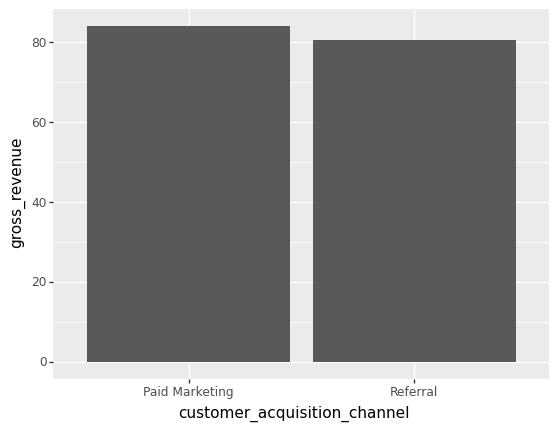

<ggplot: (6660849)>

In [56]:
(
    ggplot(average_ticket)
    + aes(x="customer_acquisition_channel", y="gross_revenue")
    + labs(
        x="customer_acquisition_channel",
        y="gross_revenue",
    )
    + geom_col()
)

## Número de clientes únicos por ano 2013x2015

In [46]:
unique_customers = df.groupby(by='year', as_index=False).nunique()
unique_customers.drop(columns=(['customer_acquisition_channel', 'week', 'net_revenue', 'boxes', 'date', 'gross_revenue']), inplace=True)

In [47]:
unique_customers = unique_customers.drop(index=(1))

In [48]:
# Em 2013 tivemos 35851 clientes únicos
# Em 2015 este número subiu para 51643

unique_customers

,year,customer_id
0,2013,35851
2,2015,51643


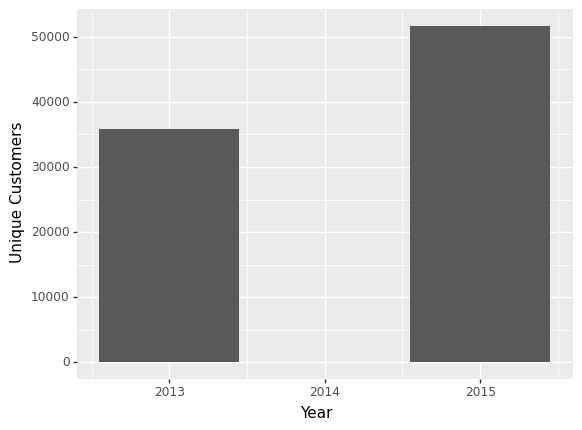

<ggplot: (33732828)>

In [49]:
(
    ggplot(unique_customers)
    + aes(x="year", y="customer_id")
    + labs(
        x="Year",
        y="Unique Customers",
    )
    + geom_col()
)

## Maiores compradores

In [57]:
biggest_buyers = df.groupby(by='customer_id').size()

In [58]:
biggest_buyers = biggest_buyers.sort_values(ascending=False)

In [59]:
biggest_buyers = biggest_buyers.head(10)
biggest_buyers = pd.DataFrame(biggest_buyers)
biggest_buyers

,0
customer_id,
69490,152
74972,150
84751,145
74011,144
75490,142
24772,142
74182,137
75153,137
93762,136


In [60]:
# Identificando os 10 maiores compradores para que a área de marketing possa fazer algum tipo de campanha.
# Da mesma forma, mas em sentido inverso, poderia ser feito o levantamento dos que compram menos.

data = [
    [69490, 152],
    [74972, 150],
    [84751, 145],
    [74011, 144],
    [75490, 142],
    [24772, 142],
    [74182, 137],
    [75153, 137],
    [93762, 136],
    [101602, 136]
]

# Converter a lista em um DataFrame
n_purchases = pd.DataFrame(data)

# Adicionar nomes de coluna aos cabeçalhos
n_purchases.columns = ['customer_id', 'n_purchases']

# Exibir o DataFrame
n_purchases

,customer_id,n_purchases
0,69490,152
1,74972,150
2,84751,145
3,74011,144
4,75490,142
5,24772,142
6,74182,137
7,75153,137
8,93762,136
9,101602,136


## Quantidade de vendas

In [61]:
amount_of_sales = df['customer_id'].count()
amount_of_sales

715875

## Total de clientes únicos

In [62]:
unique_customers = df['customer_id'].nunique()
unique_customers

118903

## Total de vendas 

In [63]:
sales_amount = df['gross_revenue'].sum()
sales_amount

29659120

## Lucro total

In [64]:
total_profit = df['net_revenue'].sum()
total_profit

26068901

## Total de descontos

In [65]:
discounts = sales_amount - total_profit
discounts

3590219

## Organizando dataframe

In [66]:
biggest_buyers.head(1)

,0
customer_id,
69490,152


In [67]:
new_df = biggest_buyers.head(1)

In [68]:
new_df['amount_of_sales'] = amount_of_sales

In [69]:
new_df['unique_customers'] = unique_customers

In [70]:
new_df['sales_amount'] = sales_amount

In [71]:
new_df['total_profit'] = total_profit

In [72]:
new_df['discounts'] = discounts

In [73]:
new_df = pd.DataFrame(new_df)

In [74]:
new_df.T

customer_id,69490
0,152
amount_of_sales,715875
unique_customers,118903
sales_amount,29659120
total_profit,26068901
discounts,3590219


In [75]:
# Criando o DataFrame
data = {
    'amount_of_sales': [715875],
    'unique_customers': [118903],
    'sales_amount': [29659120],
    'total_profit': [26068901],
    'discounts': [3590219]
}

table = pd.DataFrame(data)

# Adicionando cabeçalho para a primeira coluna
table.index.name = 'Totals'

# Formatando os valores das colunas
table['sales_amount'] = table['sales_amount'].apply(lambda x: 'R${:,.2f}'.format(x))
table['total_profit'] = table['total_profit'].apply(lambda x: 'R${:,.2f}'.format(x))
table['discounts'] = table['discounts'].apply(lambda x: 'R${:,.2f}'.format(x))

# Exibir DataFrame
table.T

Totals,0
amount_of_sales,715875
unique_customers,118903
sales_amount,"R$29,659,120.00"
total_profit,"R$26,068,901.00"
discounts,"R$3,590,219.00"


# Linear Regression

In [140]:
# Importando as bibliotecas utilizadas no projeto

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from datetime import datetime
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_predict
import plotnine
from pmdarima.arima.utils import ndiffs
from sklearn.preprocessing import StandardScaler
import pmdarima as pm
import tensorflow as tf
import math
from matplotlib import rcParams

In [77]:
df_dashboard.head()

,date,net_revenue,gross_revenue
0,2013-01-14,7.745003,8.305731
1,2013-01-21,9.420763,9.918179
2,2013-01-28,10.158401,10.470306
3,2013-02-04,10.483270,10.706408
4,2013-02-11,10.642993,10.865421


In [78]:
# Verificando o período que o dataset está apresentando

df_dashboard.head()

,date,net_revenue,gross_revenue
0,2013-01-14,7.745003,8.305731
1,2013-01-21,9.420763,9.918179
2,2013-01-28,10.158401,10.470306
3,2013-02-04,10.483270,10.706408
4,2013-02-11,10.642993,10.865421


In [79]:
# Agrupando e somando por semana

df_grouped = df_dashboard.groupby(pd.Grouper(key='date', freq='W')).sum()

In [80]:
# Conferindo se foram agrupados por semana e se está apresentando o valor total para cada semana

df_grouped

,net_revenue,gross_revenue
date,,
2013-01-20,7.745003,8.305731
2013-01-27,9.420763,9.918179
2013-02-03,10.158401,10.470306
2013-02-10,10.483270,10.706408
2013-02-17,10.642993,10.865421
...,...,...
2015-12-06,12.412094,12.564775
2015-12-13,12.490488,12.646139
2015-12-20,12.473222,12.597429


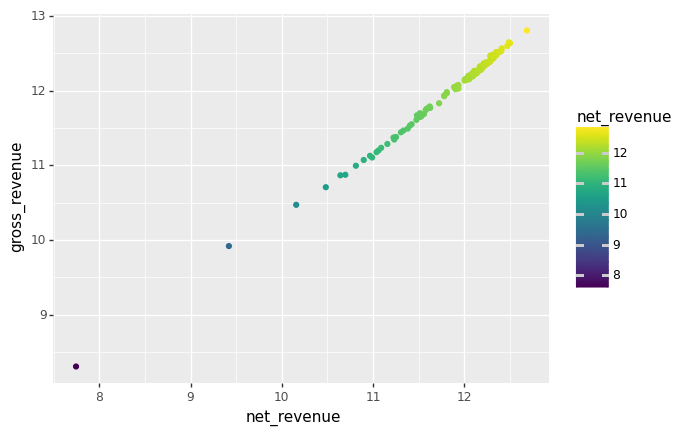

In [81]:
# Plotando gráfico de dispersão para avaliar a relação entre as features "gross_revenue" e "net_revenue"

plotnine.qplot(x='net_revenue', y='gross_revenue', data=df_grouped, color='net_revenue').draw();

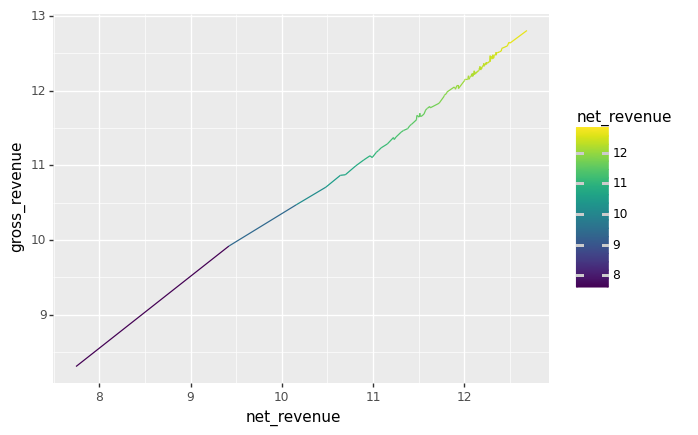

<ggplot: (48200985)>

In [82]:
(ggplot(data=df_grouped,
           mapping=aes(x='net_revenue',
                          y='gross_revenue',
                          color='net_revenue'))
    + geom_line()
)

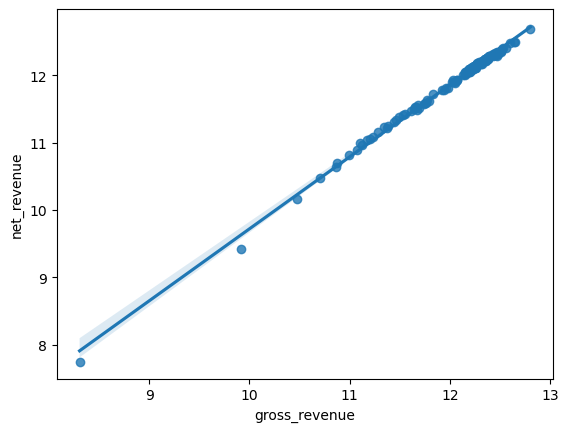

In [101]:
sns.regplot(df_grouped['gross_revenue'], df_grouped['net_revenue']);

In [83]:
# Acrescenta uma linha vazia ao dataset para previsão de receita futura com base na passada. 

df_shift = df_grouped.shift(1)
df_shift.drop(columns='gross_revenue', inplace=True)

In [84]:
df_shift

,net_revenue
date,
2013-01-20,NaN
2013-01-27,7.745003
2013-02-03,9.420763
2013-02-10,10.158401
2013-02-17,10.483270
...,...
2015-12-06,12.313365
2015-12-13,12.412094
2015-12-20,12.490488


In [85]:
df_shift.dropna(inplace=True)

In [86]:
df_shift

,net_revenue
date,
2013-01-27,7.745003
2013-02-03,9.420763
2013-02-10,10.158401
2013-02-17,10.483270
2013-02-24,10.642993
...,...
2015-12-06,12.313365
2015-12-13,12.412094
2015-12-20,12.490488


In [87]:
# Vamos manter os últimos 30% do dataset para teste

train_size = 0.7
index = round(train_size*df_shift.shape[0])
df_train = df_shift.iloc[:index]
df_test = df_shift.iloc[index:]

In [88]:
df2 = df_shift.copy()
df2_train = df_train.copy()
df2_test = df_test.copy()

# Itera sobre o range de 1 a 6 (pois o último número é ignorado)
# da coluna "net_revenue", deslocando os dados para o futuro
# e armazenando em novas colunas, separando em treino e teste

# Construindo 6 features autoregressivas 

for i in range(1, 7):
    df2_train[f't - {i}'] = df_train.shift(i)
    df2_test[f't - {i}'] = df_test.shift(i)

df2_train.dropna(inplace=True)
df2_test.dropna(inplace=True)

df2_train.head()

,net_revenue,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6
date,,,,,,,
2013-03-10,10.812915,10.697249,10.642993,10.483270,10.158401,9.420763,7.745003
2013-03-17,10.899144,10.812915,10.697249,10.642993,10.483270,10.158401,9.420763
2013-03-24,10.991511,10.899144,10.812915,10.697249,10.642993,10.483270,10.158401
2013-03-31,10.967681,10.991511,10.899144,10.812915,10.697249,10.642993,10.483270
2013-04-07,11.061516,10.967681,10.991511,10.899144,10.812915,10.697249,10.642993


In [89]:
# Separando o conjunto de dados em treino e teste

X_train = df2_train.drop(columns=['net_revenue'])
y_train = df2_train['net_revenue']
X_test = df2_test.drop(columns=['net_revenue'])
y_test = df2_test['net_revenue']

print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(102, 6) (102,) (40, 6) (40,)


In [90]:
# Padronizando os dados pela variação

standard = StandardScaler()
X_train_standard_fit = standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

In [91]:
y_train = pd.DataFrame(y_train)

In [92]:
y_test = pd.DataFrame(y_test)

In [93]:
X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns)

In [94]:
X_test_standard = pd.DataFrame(X_test_standard, columns=X_test.columns)

In [95]:
# Cria o modelo de regressão linear
regressor = LinearRegression()

# Treina o modelo
regressor.fit(X_train_standard, y_train)

LinearRegression()

In [96]:
# Pontuação do modelo com base no seu coeficiente de determinação r2
# Mostra o quanto as features conseguem explicar o target.
# Também demonstra o quanto o modelo consegue captar a variância dos dados.

regressor.score(X_test_standard, y_test)

0.36525232762051885

In [97]:
# Prevendo o receita

linreg_pred = regressor.predict(X_test_standard)

In [98]:
linreg_mape = mean_absolute_percentage_error(y_test, linreg_pred)

In [99]:
linreg_mape

0.006064802333523808

In [102]:
last_months = X_test_standard.iloc[-24:] # Separando os últimos seis meses para previsão dos seis meses futuros

forecast_months = regressor.predict(last_months) # Prevendo os próximos seis meses

In [103]:
# Verificando a porcentagem de erro do nosso modelo

linreg_mape = mean_absolute_percentage_error(y_test[-24:], forecast_months)

print('MAPE =', round(linreg_mape, 2))

MAPE = 0.01


In [104]:
last_months = X_test_standard.iloc[-24:]
forecast_months = regressor.predict(last_months)

# Printa a receita prevista
print("Previsão de receita a cada semana para os próximos seis meses:")
for i in range(len(forecast_months)):
    print(f"Week {i+1}: {forecast_months[i]}")

Previsão de receita a cada semana para os próximos seis meses:
Week 1: [12.1853815]
Week 2: [12.18118606]
Week 3: [12.16133442]
Week 4: [12.13868114]
Week 5: [12.13290273]
Week 6: [12.11212]
Week 7: [12.10301345]
Week 8: [12.12418121]
Week 9: [12.12153126]
Week 10: [12.13685271]
Week 11: [12.20081976]
Week 12: [12.24120645]
Week 13: [12.24264711]
Week 14: [12.25924328]
Week 15: [12.27894581]
Week 16: [12.2801961]
Week 17: [12.27327787]
Week 18: [12.25996888]
Week 19: [12.28319102]
Week 20: [12.28679818]
Week 21: [12.29478109]
Week 22: [12.35868372]
Week 23: [12.40258672]
Week 24: [12.38778671]


# ARIMA

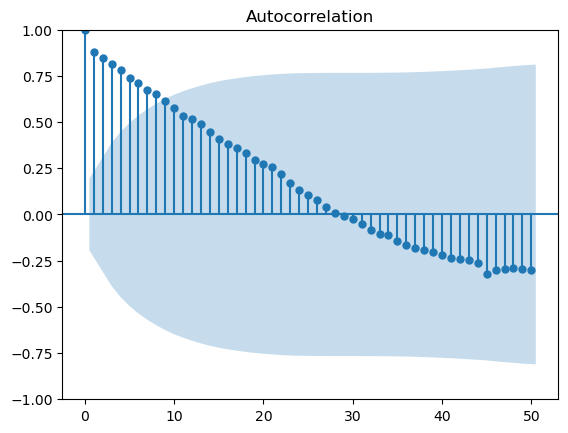

In [105]:
# Não há picos na correlação, indicando que não há sazonalidade

plot_acf(y_train, lags=50);

In [106]:
# Número de diferenças necessárias para que as séries temporais se tornem estacionárias

ndiffs(y_train)

1

''

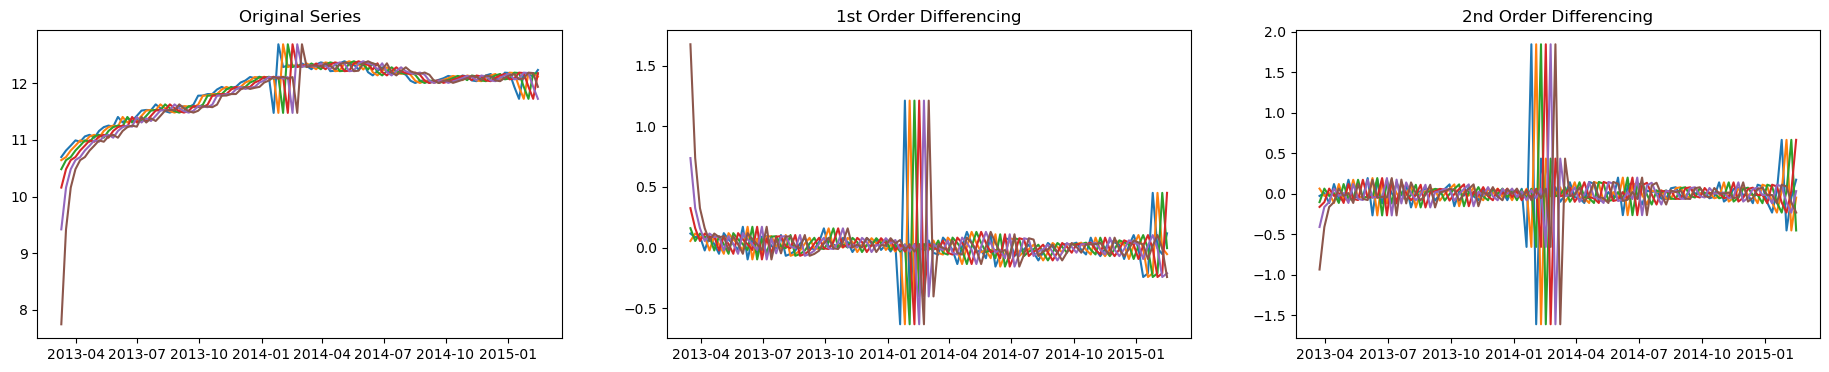

In [111]:
# Comparando e plotando a diferença entre os dados
# para verificar a estacionaridade

zero_diff = X_train
first_order_diff = X_train.diff(1)
second_order_diff = X_train.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(23,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing')
;

In [112]:
arima = pm.auto_arima(y_train, scoring='mae',
                       start_p=0, max_p=5,
                       start_q=0, max_q=5,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-74.212, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-100.628, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-104.518, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-74.212, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-106.131, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-103.051, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-108.843, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-107.107, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-109.990, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-100.422, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-104.641, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-102.938, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-104.034, Time=0.12 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-100.659, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0]            

In [113]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  60.995
Date:                Mon, 22 May 2023   AIC                           -109.990
Time:                        17:53:12   BIC                            -94.299
Sample:                    03-10-2013   HQIC                          -103.638
                         - 02-15-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       8.316e-06   3.29e-05      0.253      0.800   -5.61e-05    7.28e-05
ar.L1          0.8553      0.167      5.110      0.000       0.527       1.183
ar.L2          0.0501      0.186      0.270      0.7

In [114]:
# Salvando a previsão na variável 'arima_predict' para comparação do score dos modelos

arima_predict = arima.predict(n_periods=27)

In [115]:
# Verificando a porcentagem de erro do nosso modelo

arima_mape = mean_absolute_percentage_error(y_test[-27:], arima_predict)

print('MAPE =', round(arima_mape, 2))

MAPE = 0.01


In [116]:
#Prevendo os 6 meses futuros baseado nos últimos seis meses

arima.predict(n_periods=27)

2015-02-22    12.191218
2015-03-01    12.211915
2015-03-08    12.227789
2015-03-15    12.243278
2015-03-22    12.258203
2015-03-29    12.272634
2015-04-05    12.286625
2015-04-12    12.300220
2015-04-19    12.313465
2015-04-26    12.326398
2015-05-03    12.339056
2015-05-10    12.351470
2015-05-17    12.363670
2015-05-24    12.375684
2015-05-31    12.387536
2015-06-07    12.399248
2015-06-14    12.410841
2015-06-21    12.422334
2015-06-28    12.433743
2015-07-05    12.445084
2015-07-12    12.456370
2015-07-19    12.467614
2015-07-26    12.478829
2015-08-02    12.490024
2015-08-09    12.501210
2015-08-16    12.512394
2015-08-23    12.523586
Freq: W-SUN, dtype: float64

# Deep Learning

In [117]:
#Deep learning simples com duas camadas, ativação linear e função de perda 'mean absolute error'

simpledeep = Sequential()

simpledeep.add(layers.Dense(3, activation="relu"))
simpledeep.add(layers.Dense(1, activation="linear"))

simpledeep.compile(loss='mae', optimizer='adam')

#Parada antecipada quando o mean absolute error parar de melhorar por 30 períodos de teste.
#Armazena o melhor valor encontrado
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

simpledeep.fit(X_train_standard, y_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es],
          verbose=1,
          validation_data=(X_test_standard, y_test))

Epoch 1/1000
7/7 [==============================] - 1s 29ms/step - loss: 11.8500 - val_loss: 12.1310
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.8090 - val_loss: 12.0669
Epoch 3/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.7690 - val_loss: 12.0011
Epoch 4/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.7283 - val_loss: 11.9349
Epoch 5/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.6873 - val_loss: 11.8698
Epoch 6/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.6470 - val_loss: 11.8047
Epoch 7/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.6048 - val_loss: 11.7402
Epoch 8/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.5639 - val_loss: 11.6769
Epoch 9/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.5216 - val_loss: 11.6137
Epoch 10/1000
7/7 [==============================] - 0s 6ms/step - loss: 11.4794 - val_loss: 11.548

7/7 [==============================] - 0s 6ms/step - loss: 3.4322 - val_loss: 1.3490
Epoch 166/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.4262 - val_loss: 1.3468
Epoch 167/1000
7/7 [==============================] - 0s 5ms/step - loss: 3.4213 - val_loss: 1.3453
Epoch 168/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.4157 - val_loss: 1.3448
Epoch 169/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.4104 - val_loss: 1.3432
Epoch 170/1000
7/7 [==============================] - 0s 5ms/step - loss: 3.4046 - val_loss: 1.3412
Epoch 171/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.3996 - val_loss: 1.3397
Epoch 172/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.3936 - val_loss: 1.3380
Epoch 173/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.3888 - val_loss: 1.3358
Epoch 174/1000
7/7 [==============================] - 0s 6ms/step - loss: 3.3827 - val_loss: 1.3348
Epoch 175/1000


7/7 [==============================] - 0s 5ms/step - loss: 2.7629 - val_loss: 1.1885
Epoch 248/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.7428 - val_loss: 1.1851
Epoch 249/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.7214 - val_loss: 1.1811
Epoch 250/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.6980 - val_loss: 1.1746
Epoch 251/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.6740 - val_loss: 1.1675
Epoch 252/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.6529 - val_loss: 1.1598
Epoch 253/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.6307 - val_loss: 1.1510
Epoch 254/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.6098 - val_loss: 1.1407
Epoch 255/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.5886 - val_loss: 1.1286
Epoch 256/1000
7/7 [==============================] - 0s 6ms/step - loss: 2.5678 - val_loss: 1.1174
Epoch 257/1000


In [118]:
#Pontuação mean absolute error do modelo

simpledeepmae = simpledeep.evaluate(X_test_standard, y_test, verbose=0)

In [119]:
simpledeepmae

1.0159672498703003

In [120]:
# Prevendo os próximos seis meses e armazendando na variável 'deepseqpred'

simpledeeppred = simpledeep.predict(X_test_standard[-28:])

1/1 [==============================] - 0s 87ms/step


In [121]:
# Resultado da previsão dos próximos seis meses

simpledeeppred

array([[11.974456 ],
       [12.635427 ],
       [11.956424 ],
       [11.658309 ],
       [12.053908 ],
       [12.234739 ],
       [12.187063 ],
       [11.598602 ],
       [11.143854 ],
       [11.701351 ],
       [11.409086 ],
       [10.38337  ],
       [11.0745535],
       [11.197938 ],
       [10.904135 ],
       [12.1404915],
       [13.132814 ],
       [12.829351 ],
       [13.468111 ],
       [14.05814  ],
       [14.260155 ],
       [13.449329 ],
       [13.804627 ],
       [14.244466 ],
       [14.831105 ],
       [14.675204 ],
       [15.257061 ],
       [17.081415 ]], dtype=float32)

In [122]:
# Deep learning LSTM(Long Short Term Memory).
# Tradeoff: Perde em desempenho por ser mais robusto,
# ganha em qualidade por maior acertividade.
# Evita o ("vanishing gradient").
# batch_size=16 pega 16 amostras por teste.
# epochs=1000 quantidade de vezes que será treinado.
# Validation_split=0.3 separa 30% dos dados para o conjunto de validação.

deepLSTM = Sequential()
deepLSTM.add(LSTM(units=3, activation='relu', input_shape=(6,1)))
deepLSTM.add(layers.Dense(1, activation="linear"))

deepLSTM.compile(loss='mae', optimizer='adam')

es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

deepLSTM.fit(X_train_standard, y_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es],
          verbose=1,
          validation_data=(X_test_standard, y_test))

Epoch 1/1000
7/7 [==============================] - 2s 41ms/step - loss: 11.9394 - val_loss: 12.1913
Epoch 2/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.9215 - val_loss: 12.1809
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 11.9035 - val_loss: 12.1702
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 11.8866 - val_loss: 12.1592
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 11.8696 - val_loss: 12.1476
Epoch 6/1000
7/7 [==============================] - 0s 8ms/step - loss: 11.8523 - val_loss: 12.1355
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 11.8370 - val_loss: 12.1230
Epoch 8/1000
7/7 [==============================] - 0s 8ms/step - loss: 11.8214 - val_loss: 12.1098
Epoch 9/1000
7/7 [==============================] - 0s 8ms/step - loss: 11.8064 - val_loss: 12.0959
Epoch 10/1000
7/7 [==============================] - 0s 8ms/step - loss: 11.7910 - val_loss: 12.081

In [123]:
# Pontuação mean absolute error do modelo

LSTMmae = deepLSTM.evaluate(X_test_standard, y_test, verbose=0)

In [124]:
LSTMmae

0.09965221583843231

In [125]:
# Prevendo os próximos seis meses e armazendando na variável 'deepLSTMpred'

deepLSTMpred = deepLSTM.predict((X_test_standard[-28:]))

1/1 [==============================] - 0s 159ms/step


In [126]:
# Previsão dos seis meses futuros

deepLSTMpred

array([[12.206302 ],
       [12.190825 ],
       [12.167733 ],
       [12.108247 ],
       [12.199829 ],
       [12.1109915],
       [12.120226 ],
       [12.145307 ],
       [12.196955 ],
       [12.124969 ],
       [12.092606 ],
       [12.148463 ],
       [12.088811 ],
       [12.206464 ],
       [12.156252 ],
       [12.136012 ],
       [12.073907 ],
       [12.167922 ],
       [12.358665 ],
       [12.248828 ],
       [12.164212 ],
       [12.096782 ],
       [12.586078 ],
       [12.499324 ],
       [12.248719 ],
       [12.211209 ],
       [12.406522 ],
       [12.607877 ]], dtype=float32)

In [127]:
simpledeep_mape = mean_absolute_percentage_error(y_test[-28:], simpledeeppred)

print('MAPE =', round(simpledeep_mape, 2))

MAPE = 0.1


In [128]:
deepLSTM_mape = mean_absolute_percentage_error(y_test[-28:], deepLSTMpred)

print('MAPE =', round(deepLSTM_mape, 2))

MAPE = 0.01


# Random Forest

In [129]:
# Treinando Random Forest com 100 árvores

forest = RandomForestRegressor(n_estimators=100, criterion='absolute_error')
forest.fit(X_train_standard, y_train)

RandomForestRegressor(criterion='absolute_error')

In [150]:
cv_results = cross_val_score(forest, X_train_standard, y_train).mean()

cv_results

-0.8319817248738781

In [151]:
#Pontuação do R²

forest.score(X_test_standard, y_test)

0.08669847557941912

In [134]:
forest_pred = forest.predict(X_test_standard)

In [135]:
forest_mape = mean_absolute_percentage_error(y_test[-28:], forest_pred[-28:])

In [136]:
forest_mape

0.007200391760188628

In [137]:
#Previsão para os seis meses futuros

forest_pred

array([12.28560785, 12.28786429, 12.27005352, 12.28179161, 12.12696242,
       12.12672561, 12.12610611, 12.24478691, 12.27913249, 12.27490703,
       12.13973429, 12.16718338, 12.10244777, 12.03057711, 12.15390649,
       12.13577195, 12.25692522, 12.12454671, 12.11497598, 12.07009106,
       12.07900262, 12.03874228, 12.05130866, 12.11450358, 12.05329115,
       12.2560927 , 12.27458389, 12.27843188, 12.1620002 , 12.2813414 ,
       12.29569182, 12.28660647, 12.21967197, 12.15012519, 12.30758716,
       12.28561402, 12.2889827 , 12.29009269, 12.29471028, 12.29726161])

In [138]:
forest_pred_mape = mean_absolute_percentage_error(y_test[-28:], forest_pred[-28:])

print('MAPE =', round(forest_pred_mape, 2))

MAPE = 0.01


# Extras

## XGBRegressor

In [152]:
xgb_reg = XGBRegressor(max_depth=100, n_estimators=1000, learning_rate=0.1)

xgb_reg.fit(X_train_standard, y_train,
            eval_metric='mape',
            #Avalia a perda em cada iteração
            eval_set=[(X_train_standard, y_train), (X_test_standard, y_test)],  
            #Para de iterar quando a perda de avaliação aumenta 30 vezes seguidas
            early_stopping_rounds=30
            )

[0]	validation_0-mape:0.86297	validation_1-mape:0.86670
[1]	validation_0-mape:0.77739	validation_1-mape:0.78345
[2]	validation_0-mape:0.70029	validation_1-mape:0.70845
[3]	validation_0-mape:0.63082	validation_1-mape:0.64087
[4]	validation_0-mape:0.56823	validation_1-mape:0.57998
[5]	validation_0-mape:0.51184	validation_1-mape:0.52513
[6]	validation_0-mape:0.46103	validation_1-mape:0.47570
[7]	validation_0-mape:0.41526	validation_1-mape:0.43117
[8]	validation_0-mape:0.37401	validation_1-mape:0.39105
[9]	validation_0-mape:0.33685	validation_1-mape:0.35491
[10]	validation_0-mape:0.30338	validation_1-mape:0.32234
[11]	validation_0-mape:0.27355	validation_1-mape:0.29165
[12]	validation_0-mape:0.24664	validation_1-mape:0.26422
[13]	validation_0-mape:0.22241	validation_1-mape:0.23891
[14]	validation_0-mape:0.20052	validation_1-mape:0.21663
[15]	validation_0-mape:0.18081	validation_1-mape:0.19594
[16]	validation_0-mape:0.16304	validation_1-mape:0.17731
[17]	validation_0-mape:0.14698	validation

[144]	validation_0-mape:0.00005	validation_1-mape:0.00878
[145]	validation_0-mape:0.00005	validation_1-mape:0.00878
[146]	validation_0-mape:0.00005	validation_1-mape:0.00878
[147]	validation_0-mape:0.00005	validation_1-mape:0.00878
[148]	validation_0-mape:0.00005	validation_1-mape:0.00878
[149]	validation_0-mape:0.00005	validation_1-mape:0.00878
[150]	validation_0-mape:0.00005	validation_1-mape:0.00878
[151]	validation_0-mape:0.00005	validation_1-mape:0.00878
[152]	validation_0-mape:0.00005	validation_1-mape:0.00878
[153]	validation_0-mape:0.00005	validation_1-mape:0.00878
[154]	validation_0-mape:0.00005	validation_1-mape:0.00878
[155]	validation_0-mape:0.00005	validation_1-mape:0.00878
[156]	validation_0-mape:0.00005	validation_1-mape:0.00878
[157]	validation_0-mape:0.00005	validation_1-mape:0.00878
[158]	validation_0-mape:0.00005	validation_1-mape:0.00878
[159]	validation_0-mape:0.00005	validation_1-mape:0.00878
[160]	validation_0-mape:0.00005	validation_1-mape:0.00878
[161]	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [153]:
xgb_pred = xgb_reg.predict(X_test_standard)

In [154]:
# Porcentagem de erro do XGBOOST
XGBRegressor_mape = mean_absolute_percentage_error(y_test, xgb_pred)

In [155]:
# Porcentagem de erro do XGBOOST

XGBRegressor_mape

0.008782636972883274

In [156]:
xgb_pred[-28:]

array([12.117029 , 12.024082 , 12.160565 , 12.105463 , 12.278524 ,
       12.096165 , 12.113112 , 11.956905 , 12.1204195, 12.069008 ,
       11.851381 , 12.171043 , 12.03124  , 12.256507 , 12.336003 ,
       12.362141 , 12.189341 , 12.323124 , 12.2651615, 12.258195 ,
       12.220901 , 12.104428 , 12.314432 , 12.258584 , 12.250392 ,
       12.309815 , 12.313184 , 12.29559  ], dtype=float32)

In [157]:
# Porcentagem de erro do XGBOOST arredondado pra cima

xgb_mape = mean_absolute_percentage_error(y_test[-28:], xgb_pred[-28:])

print('MAPE =', round(xgb_mape, 2))

MAPE = 0.01


## Prophet

In [158]:
#Formato específico requerido pelo prophet

df_prophet = df_grouped.reset_index().rename(columns={'date': 'ds', 'net_revenue':'y'})
df_prophet.head()

,ds,y,gross_revenue
0,2013-01-20,7.745003,8.305731
1,2013-01-27,9.420763,9.918179
2,2013-02-03,10.158401,10.470306
3,2013-02-10,10.483270,10.706408
4,2013-02-17,10.642993,10.865421


In [159]:
train = df_prophet.iloc[:110]
test = df_prophet.iloc[110:]

prophet = Prophet()

prophet.add_country_holidays(country_name='BR')

prophet.fit(train)

18:19:17 - cmdstanpy - INFO - Chain [1] start processing
18:19:17 - cmdstanpy - INFO - Chain [1] done processing


In [160]:
forecast_pred = prophet.predict(test)
forecast_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-03-01,12.192673,12.191681,12.744053,12.192555,12.192916,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.271469,0.271469,0.271469,0.0,0.0,0.0,12.464142
1,2015-03-08,12.193074,12.197598,12.761482,12.191430,12.195054,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.294674,0.294674,0.294674,0.0,0.0,0.0,12.487747
2,2015-03-15,12.193474,12.253146,12.795317,12.189169,12.198861,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.331377,0.331377,0.331377,0.0,0.0,0.0,12.524851
3,2015-03-22,12.193875,12.232692,12.799790,12.185990,12.203440,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.327492,0.327492,0.327492,0.0,0.0,0.0,12.521366
4,2015-03-29,12.194275,12.190230,12.734056,12.181867,12.209998,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.265634,0.265634,0.265634,0.0,0.0,0.0,12.459909


In [161]:
test.head()

,ds,y,gross_revenue
110,2015-03-01,12.164573,12.282205
111,2015-03-08,12.240416,12.351843
112,2015-03-15,12.320035,12.429916
113,2015-03-22,12.253719,12.373687
114,2015-03-29,12.268521,12.385026


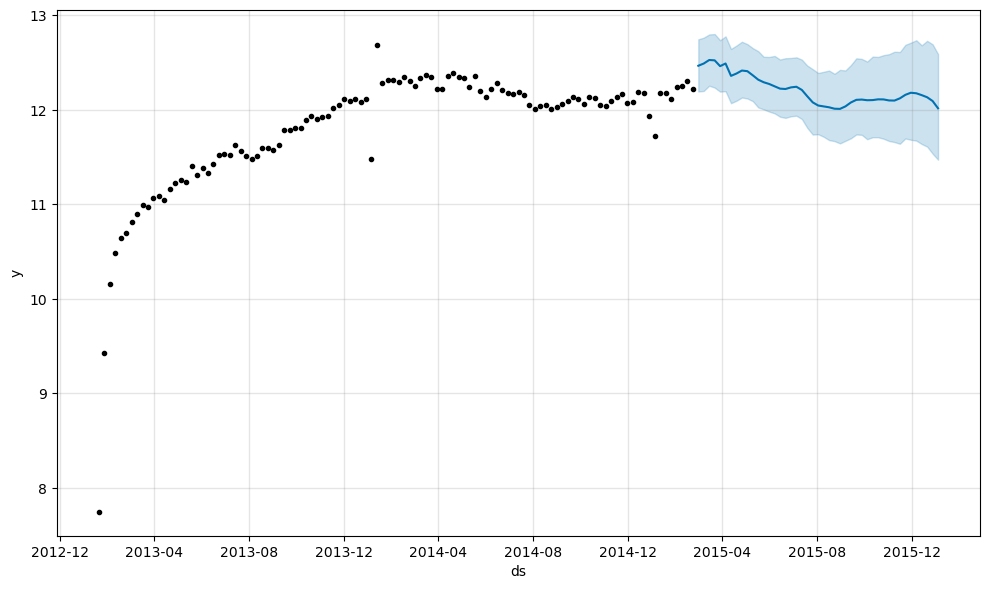

In [162]:
prophet.plot(forecast_pred);

In [189]:
future = prophet.make_future_dataframe(periods=71, freq='W', include_history=False)

In [190]:
future

,ds
0,2015-03-01
1,2015-03-08
2,2015-03-15
3,2015-03-22
4,2015-03-29
...,...
66,2016-06-05
67,2016-06-12
68,2016-06-19
69,2016-06-26


In [192]:
prophetpred = prophet.predict(future[-24:])

In [193]:
prophetpred = prophetpred['yhat']

In [194]:
# Previsão de receita para os próximos seis meses

prophetpred

0     11.956469
1     12.142171
2     12.343901
3     12.466585
4     12.493238
5     12.484723
6     12.502054
7     12.540629
8     12.547540
9     12.596899
10    12.417837
11    12.378572
12    12.396087
13    12.430672
14    12.432253
15    12.392923
16    12.344567
17    12.314020
18    12.295925
19    12.272542
20    12.246284
21    12.237799
22    12.252671
23    12.264096
Name: yhat, dtype: float64

In [196]:
prophetpred_mape = mean_absolute_percentage_error(y_test[-24:], prophetpred)

print('MAPE =', round(prophetpred_mape, 2))

MAPE = 0.02


In [198]:
six = cross_validation(prophet, horizon='24 W')

  0%|          | 0/2 [00:00<?, ?it/s]

18:30:51 - cmdstanpy - INFO - Chain [1] start processing
18:30:52 - cmdstanpy - INFO - Chain [1] done processing
18:30:52 - cmdstanpy - INFO - Chain [1] start processing
18:30:53 - cmdstanpy - INFO - Chain [1] done processing


In [200]:
# Porcentagem de erro para cada semana

performance_metrics(six)['mape']

0     0.003982
1     0.006185
2     0.003391
3     0.003003
4     0.004124
5     0.002045
6     0.003254
7     0.007780
8     0.010260
9     0.010631
10    0.009179
11    0.008734
12    0.013962
13    0.018277
14    0.013942
15    0.009962
16    0.022255
17    0.034198
18    0.031280
19    0.025739
20    0.019416
21    0.015949
22    0.015904
Name: mape, dtype: float64

# Comparativo

In [170]:
#Construindo tabela para comparação de score MAPE

score = {'Model': ['Linear Regression', 'Arima', 'Simple Deep learning', 'Deep Learning LSTM', 'Random Forest', 'XGBRegressor', 'Prophet'],
         'Score Mape': [linreg_mape, arima_mape, simpledeep_mape, deepLSTM_mape, forest_mape, xgb_mape, prophetpred_mape]}
          

In [171]:
df_score = pd.DataFrame(score)

In [172]:
#Organizando o Score por ordem crescente

df_score = round(df_score.sort_values('Score Mape'), 2)

In [173]:
# Comparativo do score dos modelos com mean absolute error

df_score

,Model,Score Mape
0,Linear Regression,0.01
4,Random Forest,0.01
5,XGBRegressor,0.01
3,Deep Learning LSTM,0.01
1,Arima,0.01
6,Prophet,0.02
2,Simple Deep learning,0.10
